In [ ]:
# %pip install nbformat
# %pip install ipywidgets
# %pip install yfinance
# %pip install seaborn
# %pip install scipy
# %pip install matplotlip
# %pip install scikit-learn
# %pip install scikit-optimize
# %pip install joblib
# %pip install plotly
# %pip install jupyter ipython django-extensions
# %pip install pandas-profiling
# %pip install skforecast==0.5.1
# %pip install pandas==1.3.4
# %pip install statsmodels==0.13.2
# %pip install pandas-profiling==3.2.0
# %pip install pyspark
# %pip install numpy
# %pip install pandas-datareader
# %pip install tabulate
# %pip install ta

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Data Preparation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# sklearn Regressor Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# sklearn Evaluation Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# skforecast Library
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from joblib import dump, load

# import EDA library
from pandas_profiling import ProfileReport

# import Visualisation library
import plotly.graph_objects as go
import plotly.express as px
from tabulate import tabulate

from ta import add_all_ta_features
from ta.utils import dropna

import warnings
warnings.simplefilter("ignore", UserWarning)


visions.backends INFO  Pandas backend loaded 1.3.4
visions.backends INFO  Numpy backend loaded 1.23.0
visions.backends INFO  Pyspark backend loaded 3.3.2
visions.backends INFO  Python backend loaded


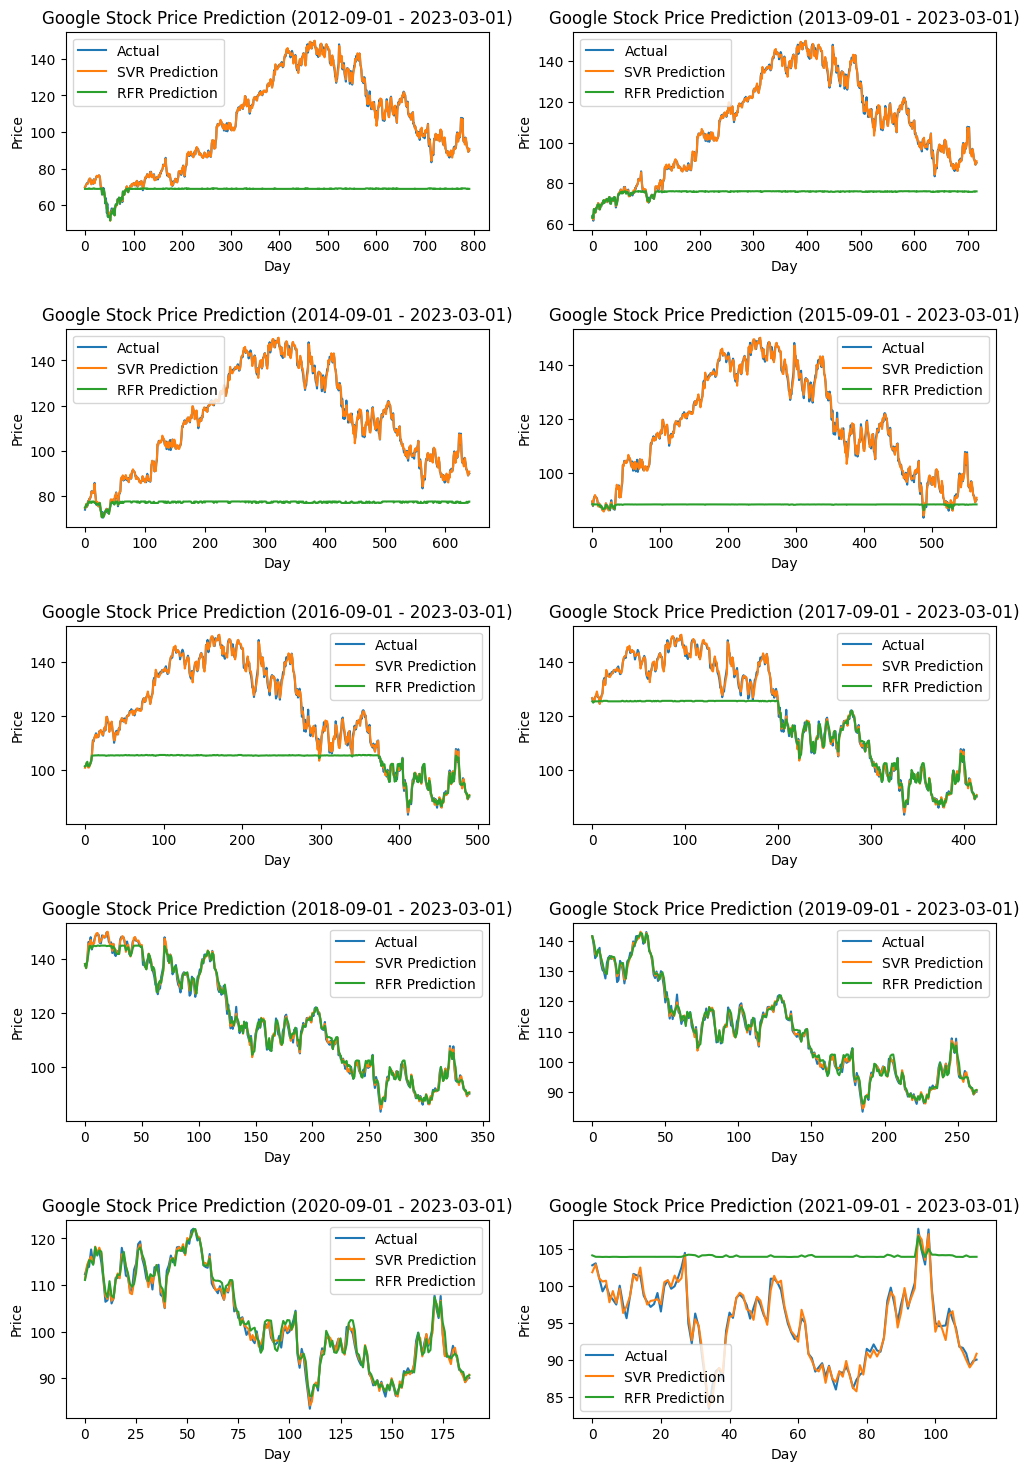

R2 Scores:

╒══════════════╤══════════╤═══════════╕
│ Start Date   │   SVR R2 │    RFR R2 │
╞══════════════╪══════════╪═══════════╡
│ 2012-09-01   │ 0.999153 │ -1.823761 │
├──────────────┼──────────┼───────────┤
│ 2013-09-01   │ 0.999005 │ -1.778679 │
├──────────────┼──────────┼───────────┤
│ 2014-09-01   │ 0.998696 │ -2.581818 │
├──────────────┼──────────┼───────────┤
│ 2015-09-01   │ 0.998189 │ -2.200266 │
├──────────────┼──────────┼───────────┤
│ 2016-09-01   │ 0.997794 │ -0.549142 │
├──────────────┼──────────┼───────────┤
│ 2017-09-01   │ 0.997807 │  0.725339 │
├──────────────┼──────────┼───────────┤
│ 2018-09-01   │ 0.997262 │  0.991959 │
├──────────────┼──────────┼───────────┤
│ 2019-09-01   │ 0.995866 │  0.990492 │
├──────────────┼──────────┼───────────┤
│ 2020-09-01   │ 0.992676 │  0.978117 │
├──────────────┼──────────┼───────────┤
│ 2021-09-01   │ 0.977661 │ -2.853706 │
╘══════════════╧══════════╧═══════════╛

MSE Scores:

╒══════════════╤═══════════╤═════════════╕
│ Start Dat

In [2]:
# Set end date for historical price data
end_date = '2023-03-01'

# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Create a 5 x 2 subplot grid
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start=start_date, end=end_date, progress=False)
    
    # Split the data into input (X) and output (y) variables
    X = df.drop(['Adj Close', 'Close'], axis=1)
    y = df['Close']

    X_train = X.iloc[:int(len(X)*0.7)]
    y_train = y.iloc[:int(len(y)*0.7)]
    
    X_test = X.iloc[int(len(X)*0.7):]
    y_test = y.iloc[int(len(y)*0.7):]
    
    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)

    # Test the models and evaluate the performance metrics
    # Evaluate SVR model
    y_svr_train_pred = svr_model.predict(X_train)
    y_svr_test_pred = svr_model.predict(X_test)
    svr_r2_score = r2_score(y_test, y_svr_test_pred)
    svr_mse_score = mean_squared_error(y_test, y_svr_test_pred)
    svr_mae_score = mean_absolute_error(y_test, y_svr_test_pred)

    # Evaluate RFR model
    y_rfr_train_pred = rfr_model.predict(X_train)
    y_rfr_test_pred = rfr_model.predict(X_test)
    rfr_r2_score = r2_score(y_test, y_rfr_test_pred)
    rfr_mse_score = mean_squared_error(y_test, y_rfr_test_pred)
    rfr_mae_score = mean_absolute_error(y_test, y_rfr_test_pred)

    # Append the performance metrics to the respective lists
    r2_scores.append([start_date, svr_r2_score, rfr_r2_score])
    mse_scores.append([start_date, svr_mse_score, rfr_mse_score])
    mae_scores.append([start_date, svr_mae_score, rfr_mae_score])
    
    row_index = i // 2  # row index for the subplot grid
    col_index = i % 2  # column index for the subplot grid

    axs[row_index][col_index].plot(y_test.to_numpy(), label='Actual')
    axs[row_index][col_index].plot(y_svr_test_pred, label='SVR Prediction')
    axs[row_index][col_index].plot(y_rfr_test_pred, label='RFR Prediction')
    axs[row_index][col_index].set_title(
        f"Google Stock Price Prediction ({start_date} - {end_date})")
    axs[row_index][col_index].set_xlabel('Day')
    axs[row_index][col_index].set_ylabel('Price')
    axs[row_index][col_index].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()

# Create tabulate tables for r2, mse, and mae metrics
r2_scores_table = tabulate(r2_scores, headers=[
                           'Start Date', 'SVR R2', 'RFR R2'], tablefmt='fancy_grid', floatfmt=".6f")
mse_scores_table = tabulate(mse_scores, headers=[
                            'Start Date', 'SVR MSE', 'RFR MSE'], tablefmt='fancy_grid', floatfmt=".6f")
mae_scores_table = tabulate(mae_scores, headers=[
                            'Start Date', 'SVR MAE', 'RFR MAE'], tablefmt='fancy_grid', floatfmt=".6f")

# Print the tabulate tables
print('R2 Scores:\n')
print(r2_scores_table)
print('\nMSE Scores:\n')
print(mse_scores_table)
print('\nMAE Scores:\n')
print(mae_scores_table)


NameError: name 'df_actual' is not defined

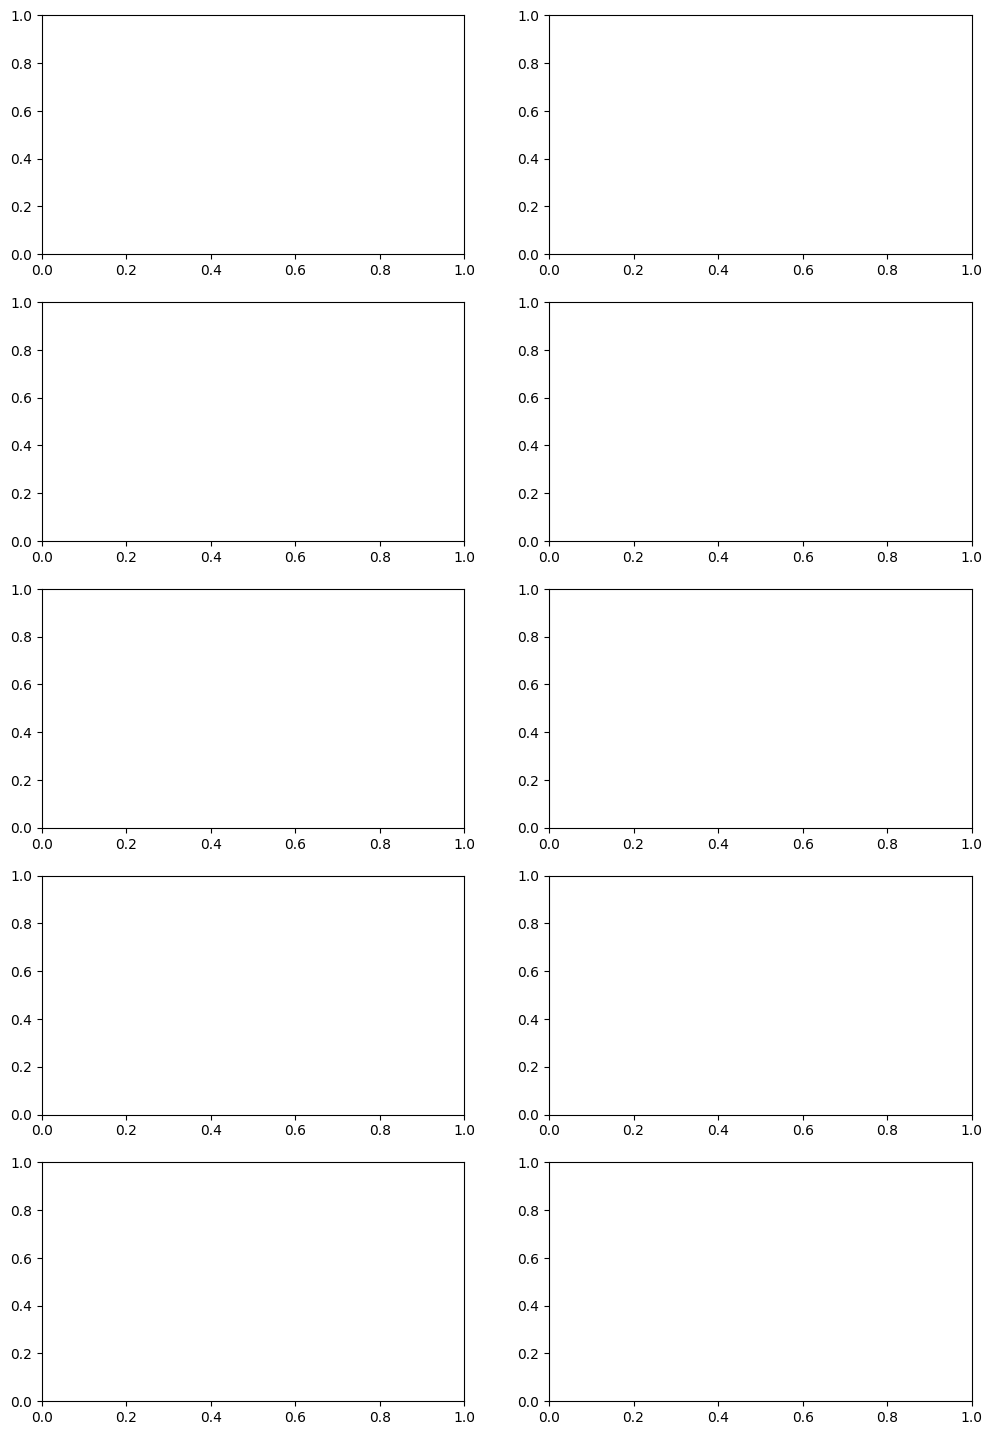

In [3]:
# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Set end date for historical price data
end_date = '2023-03-01'

# Create a 5 x 2 subplot grid
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Create lists to store the evaluation metrics for each start date
r2_scores_actual = []
mse_scores_actual = []
mae_scores_actual = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start=start_date, end=end_date, progress=False)

    # Split the data into input (X) and output (y) variables
    X = df.drop(['Adj Close', 'Close'], axis=1)
    y = df['Close']
    
    X_train = X.iloc[:int(len(X)*0.7)]
    y_train = y.iloc[:int(len(y)*0.7)]

    X_test = X.iloc[int(len(X)*0.7):]
    y_test = y.iloc[int(len(y)*0.7):]

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)
    
    # Get the last 30 days of historical data
    number_of_days = len(df_actual)
    df_scaled = scaler.transform(df.drop(['Adj Close', 'Close'], axis=1))
    last_n_days = df_scaled[-number_of_days:]

    # Scale the data using the same scaler object
    last_n_days_scaled = scaler.transform(last_n_days)
    X_pred = last_n_days_scaled

    # Make predictions for the next 30 days using the SVR & RFR model
    y_svr_pred = svr_model.predict(X_pred)
    y_rfr_pred = rfr_model.predict(X_pred)

    # Unscale the predictions
    y_svr_pred = scaler.inverse_transform(
        np.concatenate((y_svr_pred.reshape(-1, 1), last_n_days_scaled[:, 1:]), axis=1))[:, 0]

    y_rfr_pred = scaler.inverse_transform(
        np.concatenate((y_rfr_pred.reshape(-1, 1), last_n_days_scaled[:, 1:]), axis=1))[:, 0]

    # Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
    df_actual = yf.download(
        "GOOGL", start='2023-01-01', end='2023-03-29', progress=False)

    X_actual = df_actual.drop(['Adj Close', 'Close'], axis=1)
    y_actual = df_actual['Close']
    X_actual = scaler.transform(X_actual)

    row_index = i // 2  # row index for the subplot grid
    col_index = i % 2  # column index for the subplot grid

    axs[row_index][col_index].plot(y_actual.to_numpy(), label='Actual')
    axs[row_index][col_index].plot(y_svr_pred, label='SVR Prediction')
    axs[row_index][col_index].plot(y_rfr_pred, label='RFR Prediction')
    axs[row_index][col_index].set_title(
        f"Google Stock Price Prediction ({start_date} - {end_date})")
    axs[row_index][col_index].set_xlabel('Day')
    axs[row_index][col_index].set_ylabel('Price')
    axs[row_index][col_index].legend()
    
    # Test the models and evaluate the performance metrics
    # Evaluate SVR model
    # y_svr_actual = svr_model.predict(X_actual)
    svr_r2_score_actual = r2_score(y_actual, y_svr_pred)
    svr_mse_score_actual = mean_squared_error(y_actual, y_svr_pred)
    svr_mae_score_actual = mean_absolute_error(y_actual, y_svr_pred)

    # Evaluate RFR model
    # y_rfr_actual = rfr_model.predict(X_actual)
    rfr_r2_score_actual = r2_score(y_actual, y_rfr_pred)
    rfr_mse_score_actual = mean_squared_error(y_actual, y_rfr_pred)
    rfr_mae_score_actual = mean_absolute_error(y_actual, y_rfr_pred)

    # Append the performance metrics to the respective lists
    r2_scores_actual.append([start_date, svr_r2_score_actual, rfr_r2_score_actual])
    mse_scores_actual.append([start_date, svr_mse_score_actual, rfr_mse_score_actual])
    mae_scores_actual.append([start_date, svr_mae_score_actual, rfr_mae_score_actual])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()

# Create tabulate tables for r2, mse, and mae metrics
r2_scores_table_actual = tabulate(r2_scores_actual, headers=[
                           'Start Date', 'SVR R2', 'RFR R2'], tablefmt='fancy_grid', floatfmt=".10f")
mse_scores_table_actual = tabulate(mse_scores_actual, headers=[
                            'Start Date', 'SVR MSE', 'RFR MSE'], tablefmt='fancy_grid', floatfmt=".10f")
mae_scores_table_actual = tabulate(mae_scores_actual, headers=[
                            'Start Date', 'SVR MAE', 'RFR MAE'], tablefmt='fancy_grid', floatfmt=".10f")

# Print the tabulate tables
print('R2 Scores:\n')
print(r2_scores_table_actual)
print('\nMSE Scores:\n')
print(mse_scores_table_actual)
print('\nMAE Scores:\n')
print(mae_scores_table_actual)


In [ ]:
# Set end date for historical price data
end_date = '2023-03-01'

# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Create a 5 x 2 subplot grid
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start=start_date, end=end_date, progress=False)

    # Add technical indicators
    df_ta = add_all_ta_features(
        df, "Open", "High", "Low", "Close", "Volume", True)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data = scaler.fit_transform(df_ta.iloc[:int(len(df_ta)*0.7)])
    test_data = scaler.transform(df_ta.iloc[int(len(df_ta)*0.7):])

    # Split the data into input (X) and output (y) variables
    X_train, y_train = train_data[:, 1:], train_data[:, 0]
    X_test, y_test = test_data[:, 1:], test_data[:, 0]

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)

    # Test the models and evaluate the performance metrics
    # Evaluate SVR model
    y_svr_train_pred = svr_model.predict(X_train)
    y_svr_test_pred = svr_model.predict(X_test)
    svr_r2_score = r2_score(y_test, y_svr_test_pred)
    svr_mse_score = mean_squared_error(y_test, y_svr_test_pred)
    svr_mae_score = mean_absolute_error(y_test, y_svr_test_pred)

    # Evaluate RFR model
    y_rfr_train_pred = rfr_model.predict(X_train)
    y_rfr_test_pred = rfr_model.predict(X_test)
    rfr_r2_score = r2_score(y_test, y_rfr_test_pred)
    rfr_mse_score = mean_squared_error(y_test, y_rfr_test_pred)
    rfr_mae_score = mean_absolute_error(y_test, y_rfr_test_pred)

    # Append the performance metrics to the respective lists
    r2_scores.append([start_date, svr_r2_score, rfr_r2_score])
    mse_scores.append([start_date, svr_mse_score, rfr_mse_score])
    mae_scores.append([start_date, svr_mae_score, rfr_mae_score])

    row_index = i // 2  # row index for the subplot grid
    col_index = i % 2  # column index for the subplot grid

    axs[row_index][col_index].plot(y_test, label='Actual')
    axs[row_index][col_index].plot(y_svr_test_pred, label='SVR Prediction')
    axs[row_index][col_index].plot(y_rfr_test_pred, label='RFR Prediction')
    axs[row_index][col_index].set_title(
        f"Google Stock Price Prediction ({start_date} - {end_date})")
    axs[row_index][col_index].set_xlabel('Day')
    axs[row_index][col_index].set_ylabel('Price')
    axs[row_index][col_index].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()

# Create tabulate tables for r2, mse, and mae metrics
r2_scores_table = tabulate(r2_scores, headers=[
                           'Start Date', 'SVR R2', 'RFR R2'], tablefmt='fancy_grid', floatfmt=".6f")
mse_scores_table = tabulate(mse_scores, headers=[
                            'Start Date', 'SVR MSE', 'RFR MSE'], tablefmt='fancy_grid', floatfmt=".6f")
mae_scores_table = tabulate(mae_scores, headers=[
                            'Start Date', 'SVR MAE', 'RFR MAE'], tablefmt='fancy_grid', floatfmt=".6f")

# Print the tabulate tables
print('R2 Scores:\n')
print(r2_scores_table)
print('\nMSE Scores:\n')
print(mse_scores_table)
print('\nMAE Scores:\n')
print(mae_scores_table)


In [ ]:
# Set end date for historical price data
end_date = '2023-03-01'

# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Create a 5 x 2 subplot grid
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Create lists to store the evaluation metrics for each start date
r2_scores_actual = []
mse_scores_actual = []
mae_scores_actual = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start='2019-09-01', end=end_date, progress=False)

    # Drop unnecessary columns
    # df.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
    
    # Add technical indicators
    df_ta = add_all_ta_features(
        df, "Open", "High", "Low", "Close", "Volume", True)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data = scaler.fit_transform(df_ta.iloc[:int(len(df_ta)*0.7)])
    test_data = scaler.transform(df_ta.iloc[int(len(df_ta)*0.7):])

    # Split the data into input (X) and output (y) variables
    X_train, y_train = train_data[:, 1:], train_data[:, 0]
    X_test, y_test = test_data[:, 1:], test_data[:, 0]

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)

    # Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
    df_actual = yf.download(
        "GOOGL", start='2023-02-01', end='2023-03-29', progress=False)

    # Drop unnecessary columns
    # df_actual.drop(['Open', 'High', 'Low', 'Volume'],
    #                axis=1, inplace=True)

    df_actual2 = add_all_ta_features(
        df_actual, "Open", "High", "Low", "Close", "Volume", True)
    
    X_actual, y_actual = df_actual2[:, 1:], df_actual2[:, 0]
    
    number_of_days = len(df_actual2)

    # Get the last 30 days of historical data
    last_n_days = df[-number_of_days:]

    # Scale the data using the same scaler object
    last_n_days_scaled = scaler.transform(last_n_days)

    # Reshape the data to be in the shape expected by the model
    X_pred = last_n_days_scaled[:, 1:].reshape(-1,1)

    # Make predictions for the next 30 days using the SVR model
    y_svr_pred = svr_model.predict(X_pred)

    # Make predictions for the next 30 days using the RFR model
    y_rfr_pred = rfr_model.predict(X_pred)

    # Unscale the predictions
    y_svr_pred = scaler.inverse_transform(
        np.concatenate((y_svr_pred.reshape(-1, 1), last_n_days_scaled[:, 1:]), axis=1))[:, 0]

    y_rfr_pred = scaler.inverse_transform(
        np.concatenate((y_rfr_pred.reshape(-1, 1), last_n_days_scaled[:, 1:]), axis=1))[:, 0]

    row_index = i // 2  # row index for the subplot grid
    col_index = i % 2  # column index for the subplot grid

    axs[row_index][col_index].plot(y_actual.to_numpy(), label='Actual')
    axs[row_index][col_index].plot(y_svr_pred, label='SVR Prediction')
    axs[row_index][col_index].plot(y_rfr_pred, label='RFR Prediction')
    axs[row_index][col_index].set_title(
        f"Google Stock Price Prediction ({start_date} - {end_date})")
    axs[row_index][col_index].set_xlabel('Day')
    axs[row_index][col_index].set_ylabel('Price')
    axs[row_index][col_index].legend()

    # Test the models and evaluate the performance metrics
    # Evaluate SVR model
    y_svr_actual = svr_model.predict(X_actual)
    svr_r2_score_actual = r2_score(y_actual, y_svr_actual)
    svr_mse_score_actual = mean_squared_error(y_actual, y_svr_actual)
    svr_mae_score_actual = mean_absolute_error(y_actual, y_svr_actual)

    # Evaluate RFR model
    y_rfr_actual = rfr_model.predict(X_actual)
    rfr_r2_score_actual = r2_score(y_actual, y_rfr_actual)
    rfr_mse_score_actual = mean_squared_error(y_actual, y_rfr_actual)
    rfr_mae_score_actual = mean_absolute_error(y_actual, y_rfr_actual)

    # Append the performance metrics to the respective lists
    r2_scores_actual.append(
        [start_date, svr_r2_score_actual, rfr_r2_score_actual])
    mse_scores_actual.append(
        [start_date, svr_mse_score_actual, rfr_mse_score_actual])
    mae_scores_actual.append(
        [start_date, svr_mae_score_actual, rfr_mae_score_actual])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()

# Create tabulate tables for r2, mse, and mae metrics
r2_scores_table_actual = tabulate(r2_scores_actual, headers=[
    'Start Date', 'SVR R2', 'RFR R2'], tablefmt='fancy_grid', floatfmt=".10f")
mse_scores_table_actual = tabulate(mse_scores_actual, headers=[
    'Start Date', 'SVR MSE', 'RFR MSE'], tablefmt='fancy_grid', floatfmt=".10f")
mae_scores_table_actual = tabulate(mae_scores_actual, headers=[
    'Start Date', 'SVR MAE', 'RFR MAE'], tablefmt='fancy_grid', floatfmt=".10f")

# Print the tabulate tables
print('R2 Scores:\n')
print(r2_scores_table_actual)
print('\nMSE Scores:\n')
print(mse_scores_table_actual)
print('\nMAE Scores:\n')
print(mae_scores_table_actual)
